support vector logistics

In [1]:
import os

import numpy as np
import pandas as pd


import sklearn


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits, load_iris,make_blobs
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
inpDir = os.path.join('..', '..', 'input')
outDir = '../output'
moduleDir = 'machine_learning'

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

TEST_SIZE = 0.2

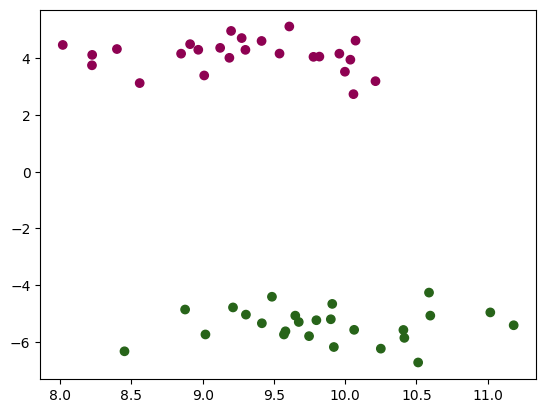

In [3]:
X , y = make_blobs(n_samples=50, centers=2, 
                    random_state=RANDOM_STATE, cluster_std=0.60)
plt.scatter(X[:,0], X[:, 1], c = y, cmap = plt.cm.PiYG)

creating kernel SVC

In [4]:

clf = SVC(kernel='linear')

clf.fit(X, y)

y_pred = clf.predict(X)
accuracy_score(y, y_pred)

1.0

construct the confusion_matrix

In [5]:
confusion_matrix(y,y_pred)

array([[25,  0],
       [ 0, 25]])

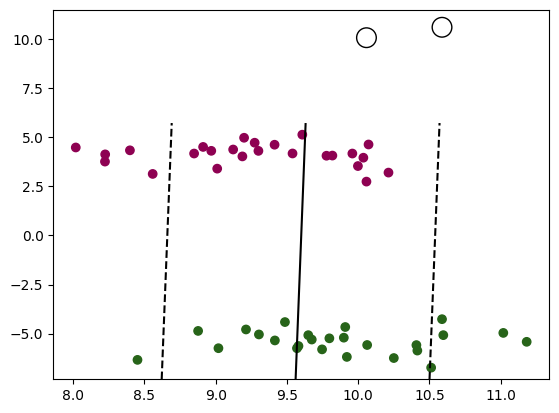

In [6]:
plt.scatter(X[:,0],X[:,1], c = y, cmap = plt.cm.PiYG)

xLim = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
yLim = np.linspace(plt.ylim()[0],plt.ylim()[1], 30)

XX, YY = np.meshgrid(xLim, yLim) #generate a mesh

preds = np.zeros_like(XX)

for i, xi in enumerate(xLim):
    for j, yj in enumerate(yLim):
        preds[i,j] = clf.decision_function(np.array([xi,yj]).reshape(1,-1)).item()
plt.contour(XX,YY, preds, colors= 'k', levels=[-1,0,1], linestyles = ['--', '-','--'])
plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,0], s = 200, edgecolors= 'k', facecolor = 'none')

In [7]:
digits = load_digits()
print (digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [8]:
print (digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

if we not give test size then it will use default test size that is 0.25

In [9]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, stratify=digits.target,test_size=TEST_SIZE, random_state=RANDOM_STATE)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

SVC: kernel: linear  | F1 score: 0.9777
SVC: kernel: rbf     | F1 score: 0.9861
SVC: kernel: poly    | F1 score: 0.9916


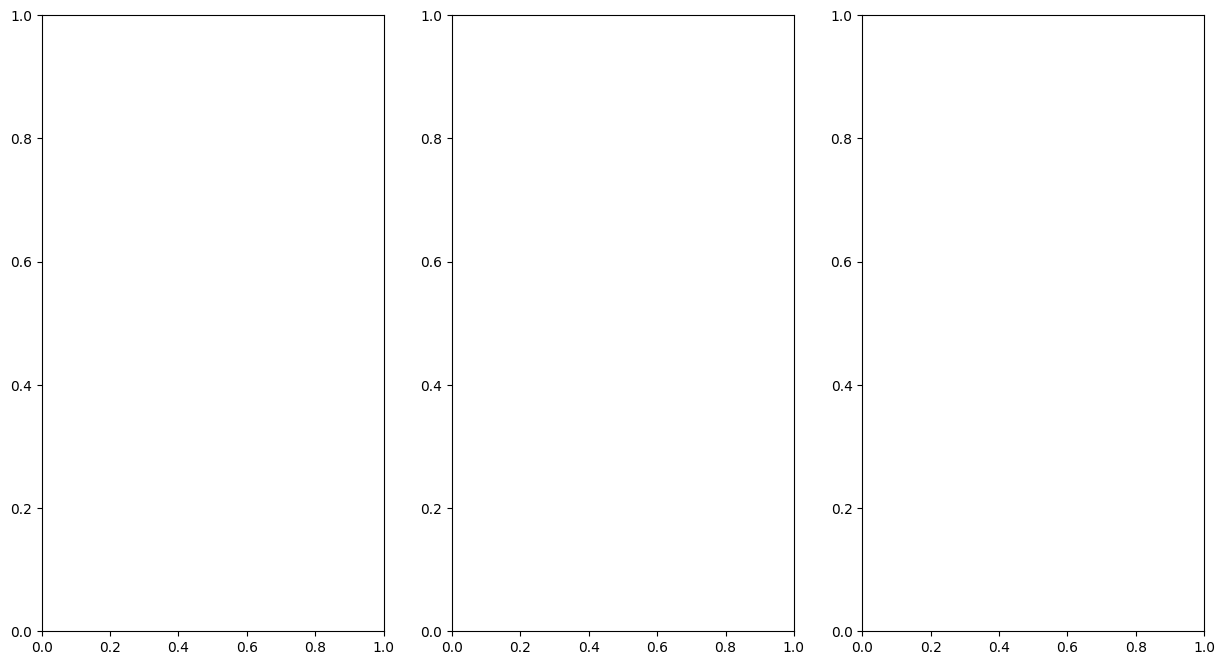

In [10]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1,3, figsize = (15,8)) #instantiate plt object

for i, knl in enumerate(['linear', 'rbf' , 'poly']):
    
    clf = SVC(kernel=knl).fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    print(f'SVC: kernel: {knl: <7} | F1 score: {f1_score(y_test, y_pred,average = "weighted"):.4f}')

SVC: kernel : linear  | F1 score: 0.9777
SVC: kernel : rbf     | F1 score: 0.9861
SVC: kernel : poly    | F1 score: 0.9916


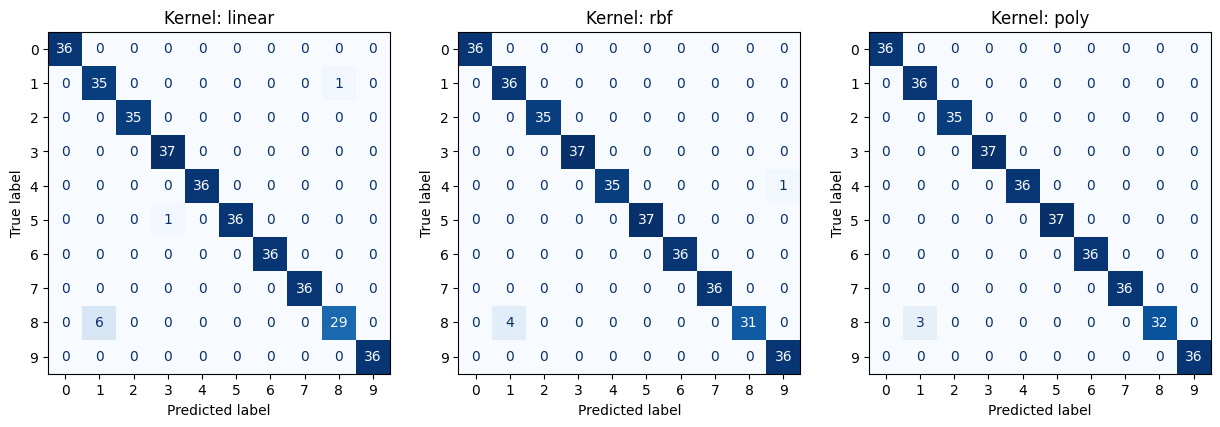

In [11]:
from sklearn.metrics import f1_score,confusion_matrix, ConfusionMatrixDisplay
fig, axes = plt.subplots(1,3, figsize = (15,8)) #instantiate plt object

for i, knl in enumerate(['linear', 'rbf','poly']):
    
    clf = SVC(kernel=knl).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print (f'SVC: kernel : {knl: <7} | F1 score: {f1_score(y_test, y_pred, average= "weighted"):.4f}')
    
    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
    
    disp.plot(ax = axes[i], cmap =plt.cm.Blues, colorbar = False)
    axes[i].set_title(f'Kernel: {knl}')

In [12]:
digits.data.shape

(1797, 64)

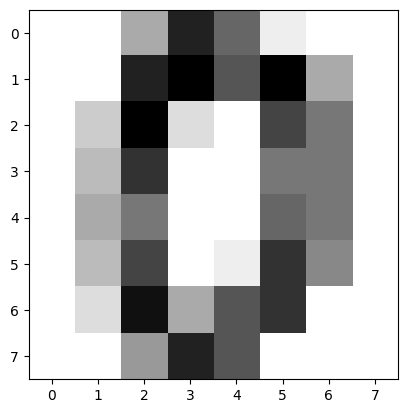

In [23]:
plt.imshow((digits.data[0].reshape(8,8))/16, cmap = plt.cm.binary)

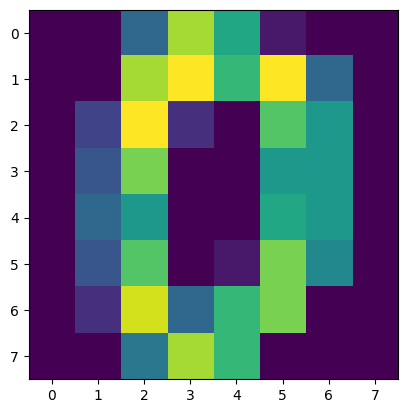

In [24]:
plt.imshow(digits.data[0].reshape(8,8))

In [14]:
iris = load_iris()

features = iris.data
labels= iris.target

features.shape, labels.shape

((150, 4), (150,))

In [21]:
def plot_hyplane(classifier, features, labels, i):
    plt.subplot(1,3,i)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    pred = classifier.predict(features) #make prediction 
    
    x_min, x_max = features[:, 0].min() - .1, features[:, 0].max() + .1
    y_min, y_max = features[:, 1].min() - .1, features[:, 1].max() + .1
    
    xx, yy = np.meshgrid (np.linspace (x_min, x_max, 1000),np.linspace (y_min, y_max, 1000))
    z = classifier.predict (np.c_[ xx.ravel(), yy.ravel()])
    
    #plot the decision surface
    z = z.reshape( xx.shape)
    plt.grid(False)
    plt.pcolormesh(xx, yy, z, cmap = plt.cm.Set3 )  #refer http://matplotlib.org/users/colormaps.html
    
    #plot also the training points
    plt.scatter( features [ :, 0], features [:, 1], c = labels, cmap=plt.cm.flag)
    
    plt.axis('tight')

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_features = pca.fit_transform(features)

features.shape, pca_features.shape


((150, 4), (150, 2))

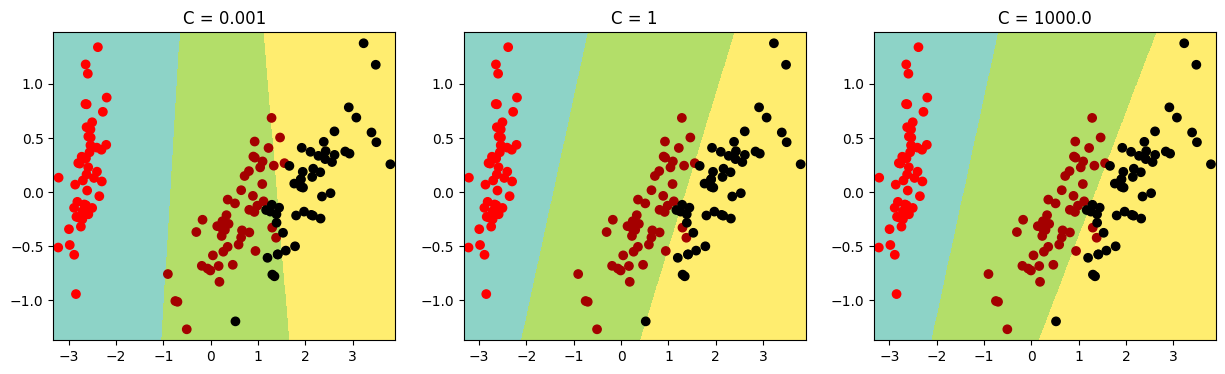

In [22]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

C_values = [1e-3, 1, 1e3]

for i, C in enumerate(C_values):
    
    clf = SVC(kernel='linear', C = C)
    
    clf.fit(pca_features, labels)
    
    plot_hyplane(clf, pca_features, labels, i+1)
    
    plt.title(f'C = {C}')
    
plt.show()

// Gamma 

small gamma $\rightarrow$ low bias,high variance
Large gamma #\rightarrows$ high bias, low variance

gamma = [0.001, 1, 'auto']

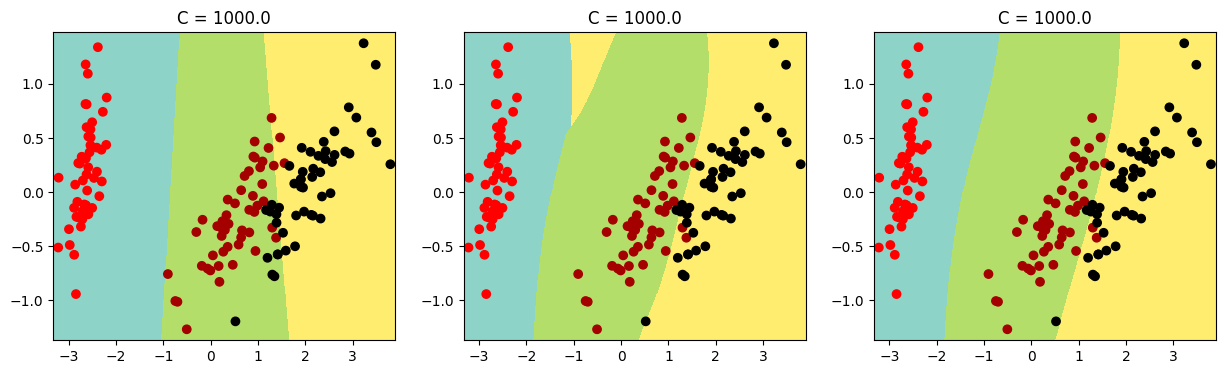

In [27]:
fig, axes = plt.subplots(1,3, figsize=(15,4))

gamma = [0.001, 1, 'auto']

for i, gm in enumerate(gamma):

    clf = SVC(kernel='rbf', gamma = gm)
    
    clf.fit(pca_features, labels)
    
    plot_hyplane(clf, pca_features, labels, i+1)
    
    plt.title(f'C = {C}')
    
plt.show()